ARTI308 - Machine Learning

# Lab 3: Exploratory Data Analysis (EDA)

EDA is the first and most important step in any Machine Learning project.
Before building models, we must understand:

- What does the data represent?
- Are there missing values?
- Are there outliers?
- What patterns exist?
- Which variables influence others?

If we do not understand the data, we cannot build a good model.

### Why EDA is Important

In real-world machine learning projects:

    1- 70–80% of the time is spent on understanding and cleaning data
    2- Only 20–30% is spent building models

**EDA helps us:**

- Detect errors
- Identify trends
- Discover relationships
- Make business decisions

![step1.png](attachment:step1.png)

In [8]:
# Load Dataset

df = pd.read_csv(r"/content/Dynamic_Factor_Model new.csv")

# Display first 5 rows
df.head()

,date,CoVaR,MES,房价收入比,指标名称,Risk.2F,Factor1,Factor2,Risk.PC,Risk.Entropy,...,期限利差,信用利差,Risk.3F,SFR.Index,指标名称.1,Risk.2F.1,转移概率,状态,Risk.3F.1,SFR.Index.1
0,2005-01-28,"0,01346637925","0,02586009146","0,4298872713",2005年1月,"-0,0007236694147","0,001344882601","-0,00279222143","-1,381884339","-1,225495217",...,"2,23","1,01","-1,281897941","50,37642446",2005年1月,"-0,0007236694147",NaN,0,"-1,281897941","50,37642446"
1,2005-02-25,"0,01306405444","0,02597570721","0,4291848411",2005年2月,"-0,003551349157","-0,0008476936592","-0,006255004656","-1,394395759","-1,231990184",...,"1,98","0,964","-1,279473389","49,93260256",2005年2月,"-0,003551349157","0,006066902066",0,"-1,279473389","49,93260256"
2,2005-03-25,"0,01376934286","0,02635577781","0,4312921316",2005年3月,"0,002914495218","0,002536237175","0,00329275326","-1,359458981","-1,210928326",...,"1,78","0,906","-1,259447491","51,15302216",2005年3月,"0,002914495218","0,006822871475",0,"-1,259447491","51,15302216"
3,2005-04-29,"0,01396746412","0,02722312889","0,4182971733",2005年4月,"0,0006766375133","-0,003249545615","0,004602820641","-1,38322925","-1,224816901",...,"1,45","0,812","-1,269371531","50,57070259",2005年4月,"0,0006766375133","0,006861680374",0,"-1,269371531","50,57070259"
4,2005-05-27,"0,01488025069","0,02876297077","0,4221605393",2005年5月,"0,01033434549","0,003114579321","0,01755411166","-1,332536249","-1,194233541",...,"1,36","0,772","-1,256949822","52,32394889",2005年5月,"0,01033434549","0,006573482208",0,"-1,256949822","52,32394889"


### Check Missing Values

In [9]:
import pandas as pd

df = pd.read_csv("/content/Dynamic_Factor_Model new.csv")
print(df.isna().sum())

date            0
CoVaR           0
MES             0
房价收入比           0
指标名称            0
Risk.2F         0
Factor1         0
Factor2         0
Risk.PC         0
Risk.Entropy    0
Risk.Equal      0
CoVaR.1         0
House           0
Debt            0
收益率             0
波动率             0
OECD            0
IVA             0
PMI             0
M2              0
期限利差            0
信用利差            0
Risk.3F         0
SFR.Index       0
指标名称.1          0
Risk.2F.1       0
转移概率            1
状态              0
Risk.3F.1       0
SFR.Index.1     0
dtype: int64


In [ ]:
print(df.isna().sum())

date            0
CoVaR           0
MES             0
房价收入比           0
指标名称            0
Risk.2F         0
Factor1         0
Factor2         0
Risk.PC         0
Risk.Entropy    0
Risk.Equal      0
CoVaR.1         0
House           0
Debt            0
收益率             0
波动率             0
OECD            0
IVA             0
PMI             0
M2              0
期限利差            0
信用利差            0
Risk.3F         0
SFR.Index       0
指标名称.1          0
Risk.2F.1       0
转移概率            1
状态              0
Risk.3F.1       0
SFR.Index.1     0
dtype: int64


### Check duplicate rows

In [ ]:
# checking duplicate rows
df.duplicated()[df.duplicated()==True]

,0


### No. of rows and columns

In [ ]:
# finding number of rows and columns

print("Shape (rows, columns): ", df.shape,"\n")

print("number of rows: ", df.shape[0])
print("number of columns: ", df.shape[1])

Shape (rows, columns):  (192, 30) 

number of rows:  192
number of columns:  30


### Data type of columns

In [ ]:
# viewing the data types of columns
df.dtypes

,0
date,object
CoVaR,object
MES,object
房价收入比,object
指标名称,object
Risk.2F,object
Factor1,object
Factor2,object
Risk.PC,object
Risk.Entropy,object


In [ ]:
df.columns = df.columns.str.strip()
# Rename 'date' column to 'Date' for consistency if it exists
df.rename(columns={c: 'Date' for c in df.columns if c.lower() == 'date'}, inplace=True)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Identify and convert numeric-like columns that are currently objects due to comma decimals
# Exclude '指标名称' and '指标名称.1' as they appear to be descriptive strings
numeric_like_cols = [col for col in df.columns if df[col].dtype == 'object' and col not in ['Date', '指标名称', '指标名称.1']]

for col in numeric_like_cols:
    df[col] = df[col].astype(str).str.replace(',', '.', regex=False)
    # Use errors='coerce' to handle non-numeric values, e.g., missing values in '转移概率'
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.dtypes

,0
Date,datetime64[ns]
CoVaR,float64
MES,float64
房价收入比,float64
指标名称,object
Risk.2F,float64
Factor1,float64
Factor2,float64
Risk.PC,float64
Risk.Entropy,float64


### Descriptive summary Statistics

In [ ]:
# Statistical summary
df.describe(include='all')

,Date,CoVaR,MES,房价收入比,指标名称,Risk.2F,Factor1,Factor2,Risk.PC,Risk.Entropy,...,期限利差,信用利差,Risk.3F,SFR.Index,指标名称.1,Risk.2F.1,转移概率,状态,Risk.3F.1,SFR.Index.1
count,192,192,192,192,192,192,192,192,192,192,...,192,192,192,192,192,192,191,192.000000,192,192
unique,NaN,192,190,191,192,192,192,192,192,192,...,116,126,192,192,192,192,185,NaN,192,192
top,NaN,"0,01346637925","0,03759989614","0,4358579278",2005年1月,"-0,0007236694147","0,001344882601","-0,00279222143","-1,381884339","-1,225495217",...,"0,38","2,27","-1,281897941","50,37642446",2005年1月,"-0,0007236694147",1,NaN,"-1,281897941","50,37642446"
freq,NaN,1,2,2,1,1,1,1,1,1,...,5,5,1,1,1,1,7,NaN,1,1
mean,2013-01-11 08:52:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.614583,NaN,NaN
min,2005-01-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,2009-01-17 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,2013-01-11 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
75%,2017-01-05 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
max,2020-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


### Univariate Analysis

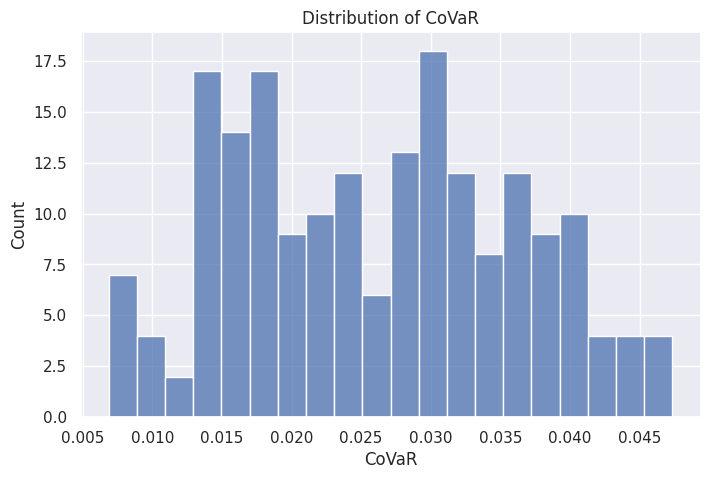

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Column cleaning and type conversion is handled in a previous cell

plt.figure(figsize=(8,5))
sns.histplot(df['CoVaR'], bins=20) # Using 'CoVaR' as a numerical column for univariate analysis
plt.title("Distribution of CoVaR") # Update title to reflect the new column
plt.show()

- Shows how shipment sizes are distributed
- Right skew = many small shipments, few large ones

### Distribution of Revenue

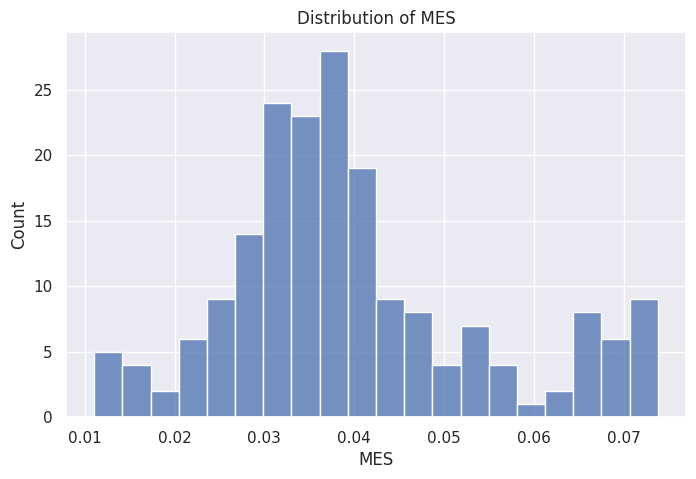

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['MES'], bins=20) # Using 'MES' as another numerical column for univariate analysis
plt.title("Distribution of MES") # Update title to reflect the new column
plt.show()

## Bivariate Analysis

### Revenue by Country

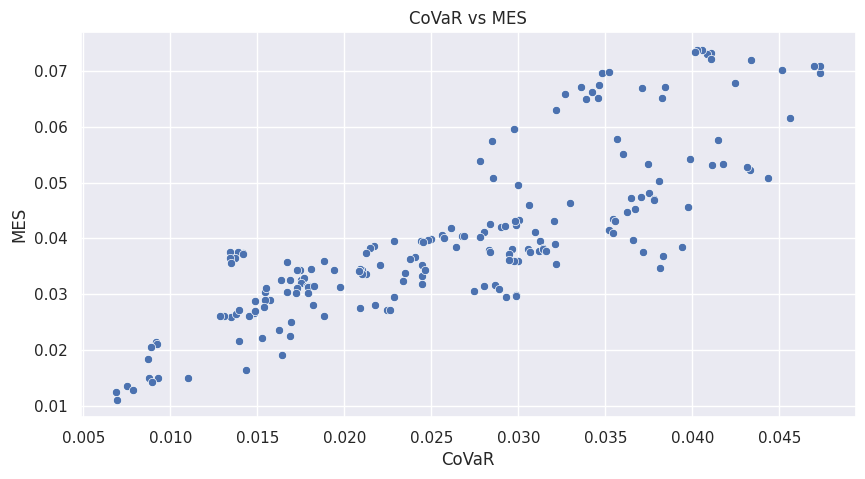

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='CoVaR', y='MES', data=df)
plt.title("CoVaR vs MES")
plt.xlabel("CoVaR")
plt.ylabel("MES")
plt.show()

### Revenue by Product

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25151 (\N{CJK UNIFIED IDEOGRAPH-623F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20215 (\N{CJK UNIFIED IDEOGRAPH-4EF7}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20837 (\N{CJK UNIFIED IDEOGRAPH-5165}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27604 (\N{CJK UNIFIED IDEOGRAPH-6BD4}) missing from font(s) DejaVu Sans.
  fig.canvas

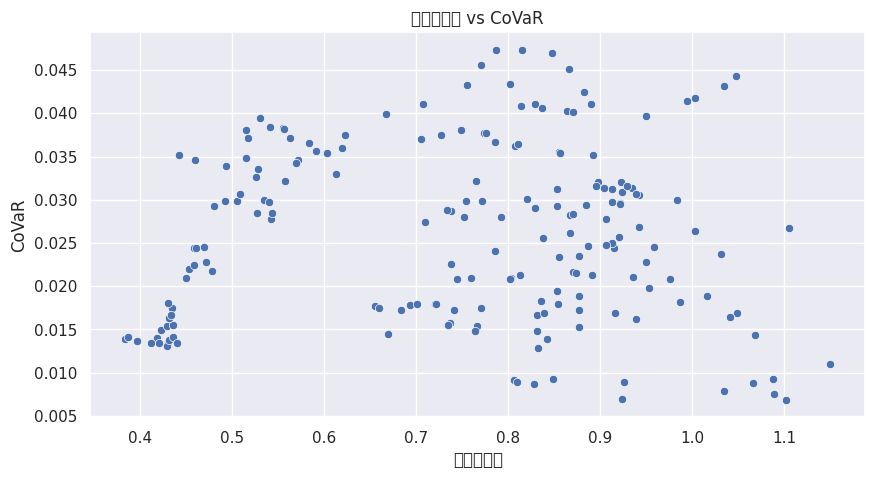

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='房价收入比', y='CoVaR', data=df)
plt.title("房价收入比 vs CoVaR")
plt.xlabel("房价收入比")
plt.ylabel("CoVaR")
plt.show()

### Revenue by Sales Person

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27874 (\N{CJK UNIFIED IDEOGRAPH-6CE2}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30410 (\N{CJK UNIFIED IDEOGRAPH-76CA}) missing from font(s) DejaVu Sans.
  fig.canvas

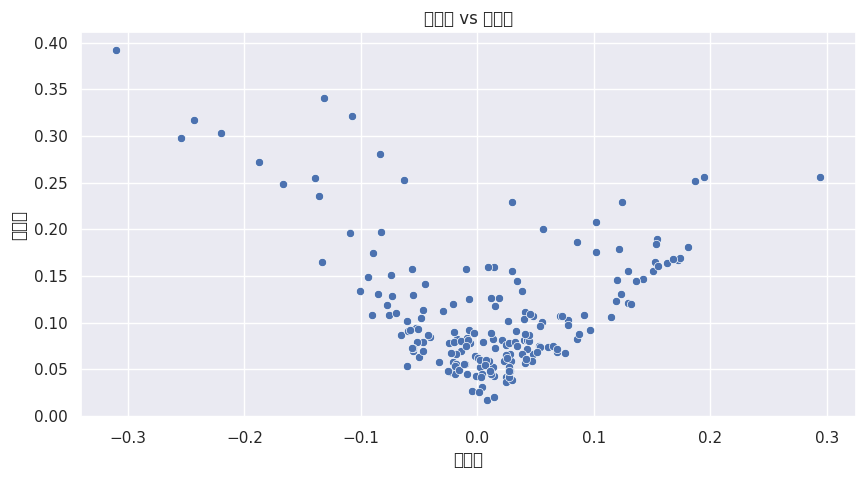

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='收益率', y='波动率', data=df)
plt.title("收益率 vs 波动率")
plt.xlabel("收益率")
plt.ylabel("波动率")
plt.show()

### Boxes vs Revenue Relationship

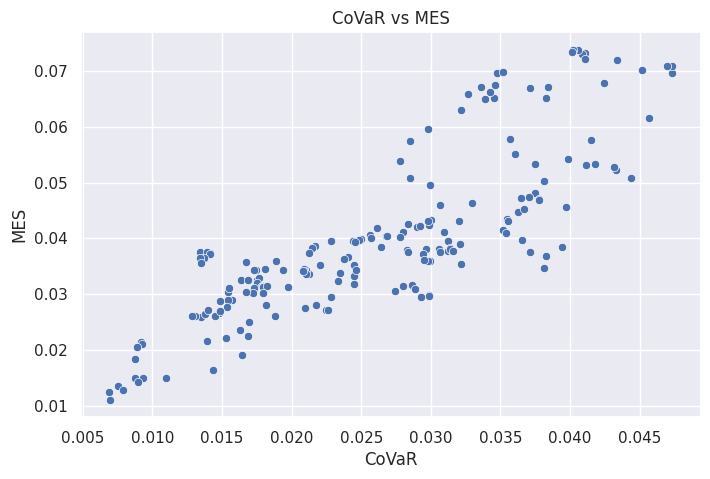

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='CoVaR', y='MES', data=df)
plt.title("CoVaR vs MES")
plt.show()

### Correlation Matrix

/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 25151 (\N{CJK UNIFIED IDEOGRAPH-623F}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 20215 (\N{CJK UNIFIED IDEOGRAPH-4EF7}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 20837 (\N{CJK UNIFIED IDEOGRAPH-5165}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 27604 (\N{CJK UNIFIED IDEOGRAPH-6BD4}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25151 (\N{CJK UNIFIED IDEOGRAPH-623F}) missi

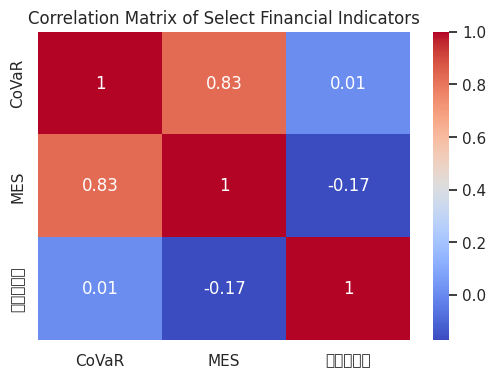

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['CoVaR', 'MES', '房价收入比']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Select Financial Indicators")
plt.show()

- Correlation close to 1 = strong positive relationship
- Close to 0 = weak relationship

## Time-Based Analysis
### Monthly Revenue Trend

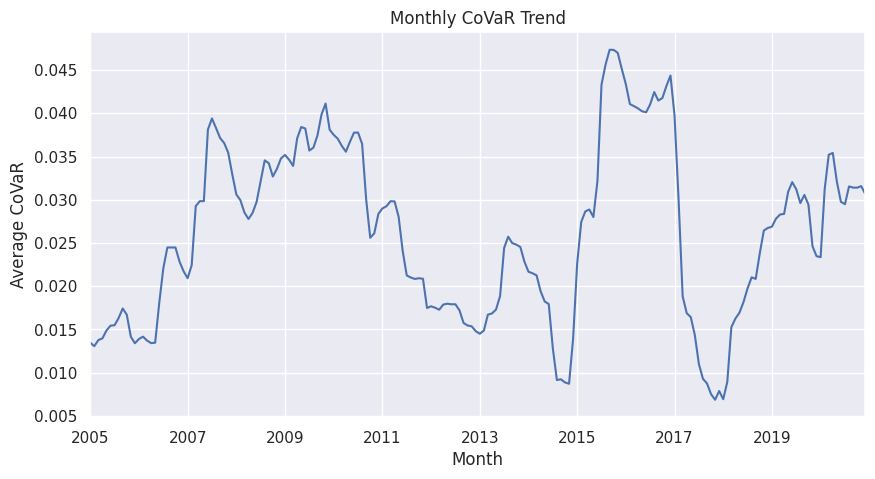

In [ ]:
df['Month'] = df['Date'].dt.to_period('M')

monthly_covar = df.groupby('Month')['CoVaR'].mean()

plt.figure(figsize=(10,5))
monthly_covar.plot()
plt.title("Monthly CoVaR Trend")
plt.ylabel("Average CoVaR")
plt.show()

# Assignment

In this assignment, you will apply the EDA techniques learned in class to a dataset of your choice. You must submit the dataset file with your notebook.


End of lab 3.